In [2]:
import numpy as np 
import scipy as sp 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import nltk

import os
print(os.listdir("./"))

['.ipynb_checkpoints', 'google-amazon-facebook-employee-reviews.zip', 'heart-disease-uci', 'heart-disease-uci.zip', 'HW1_part1.ipynb', 'HW1_part2 .ipynb', 'Reviews.csv', 'students-performance-in-exams', 'students-performance-in-exams.zip']


In [3]:
data_path = "./Reviews.csv"
pd_data = pd.read_csv(data_path)

In [4]:
type(pd_data)

pandas.core.frame.DataFrame

In [5]:
pd_data = pd_data[:10000]

In [6]:
pd_data.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [7]:
#1-1
#Top 10
P_score = pd_data[["UserId" , "ProfileName" , "Score"]]
P_score = P_score.set_index(["UserId", "ProfileName"])
P_score = P_score.groupby(level=0).mean()
TopTR = pd_data[["UserId", "ProfileName","Text"]]
TopTR = TopTR.set_index(["UserId", "ProfileName"])
TopTR = TopTR.count(level="UserId")
TopTR = TopTR.merge(P_score, left_index = True, right_index= True )
TopTR = TopTR.sort_values(by = ["Text"],ascending = False)
TopTR = TopTR.set_axis(["Score count","Score mean"], axis="columns", inplace=False)
TopTR = TopTR.nlargest(10, "Score count")
TopTR    ###result

,Score count,Score mean
UserId,,
A1Z54EM24Y40LL,17,3.882353
A2SZLNSI5KOQJT,10,3.800000
A35R32TA60XD57,9,4.111111
A281NPSIMI1C2R,8,5.000000
A3OXHLG6DIBRW8,7,4.428571
A3NHUQ33CFH3VM,7,3.142857
A3PJZ8TU8FDQ1K,7,4.714286
AQ6SHOW0VMZGF,6,2.666667
A26NFIQ7KWI8Y7,6,2.666667


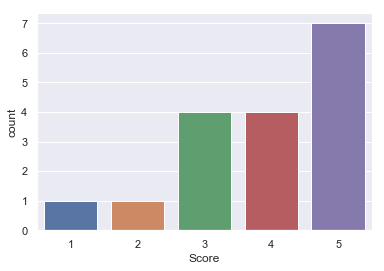

In [8]:
#1-2
#Top 1 score frequency"A1Z54EM24Y40LL"

Top_1_score = pd_data[pd_data.UserId == "A1Z54EM24Y40LL" ]
sns.set(style="darkgrid")
ax = sns.countplot(x="Score", data=Top_1_score)    ###result


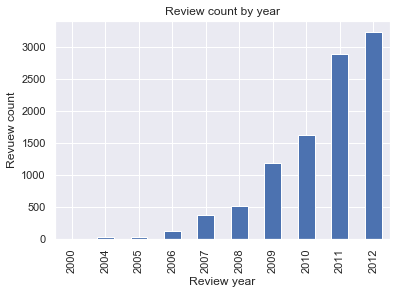

In [9]:
#1-3
#Timestamp -> date
#plt.bar([x, y])
import datetime

def Transform(x):
    y = datetime.datetime.fromtimestamp(x).year
    return y
    
pd_data["Year"] = pd_data["Time"].apply(Transform)
x = pd_data[["Year"]]
y = x["Year"].value_counts()
y = y.sort_index()
BarR = y.plot.bar(color="b")    ###result
BarR.set_xlabel('Review year')
BarR.set_ylabel('Revuew count')
BarR.set_title("Review count by year")

plt.show()

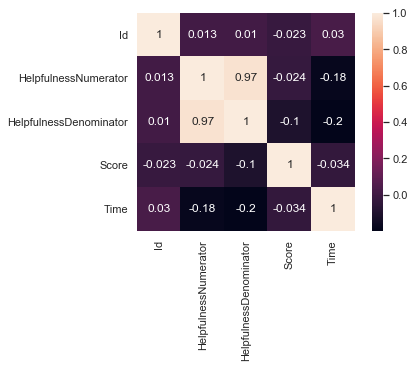

In [10]:
#1-4
#Plot HeatMap using seaborn
HMS = pd_data[["Id", "HelpfulnessNumerator" , "HelpfulnessDenominator" , "Score" , "Time"]]
HeatMap = sns.heatmap ( HMS.corr() , square=True , annot=True )    ###result

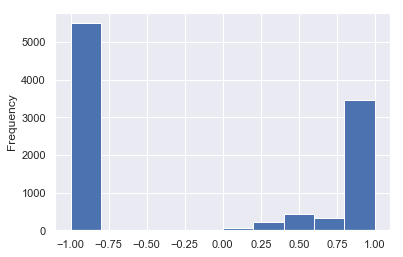

In [14]:
#1-5
#Helpful percent
pd.options.mode.chained_assignment = None  ##chian assignmnet warning off (default='warn')

def HelpRatio(row):
    if row["HelpfulnessNumerator"] > 0 and row["HelpfulnessDenominator"] > 0:
        R = row["HelpfulnessNumerator"]/row["HelpfulnessDenominator"]
        return R
    else:
        R = -1
        return R
    
HN = pd_data[["HelpfulnessNumerator", "HelpfulnessDenominator"]]
HN["Ratio"] = HN.apply (HelpRatio , axis = 1)

plt.figure()
HN["Ratio"].plot.hist()    ###result